In [29]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [30]:
# Set hyperparameters

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

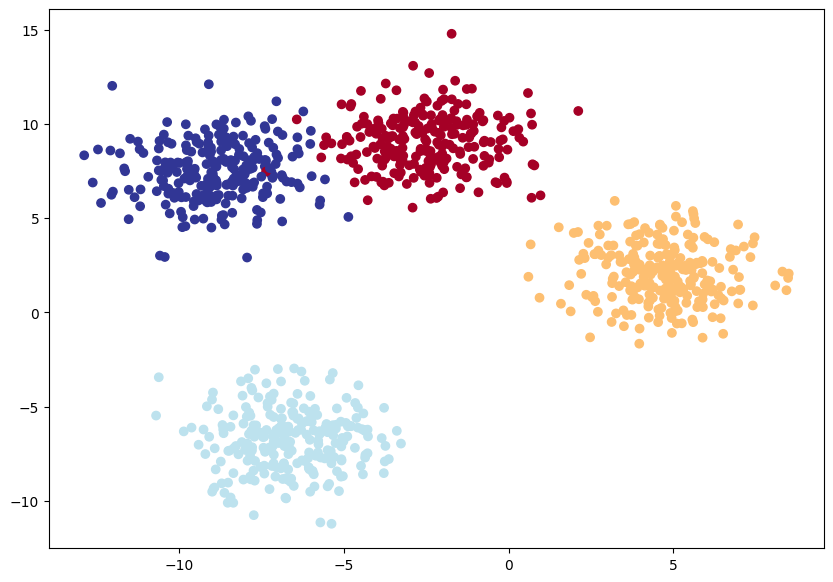

In [31]:
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES, 
                            centers=NUM_CLASSES, 
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob, y_blob = torch.from_numpy(X_blob).type(torch.float), torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, 
                                                                        test_size=0.2, 
                                                                        random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))

plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [32]:
X_blob.shape, y_blob.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [34]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """ Practicing our docstring :
        Initializes multi-class classification model.

        Args:
            input_features (int) : Number of input features to the model.
            output_features (int) : Number of output features/classes.
            hidden_units (int) : Number of hidden units between layers, default 8.

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [35]:
model_0 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)

In [36]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [37]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

In [38]:
# We get logits, in 4 dimensions.
# So we use an activation function (softmax for multiclass, sigmoid for binary)
# This gives us probabilities, so we take argmax to know which is most probable
y_logits = model_0(X_blob_test)
torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

tensor([3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
        0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
        0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
        3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0,
        0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
        3, 0, 0, 0, 0, 3, 0, 3], device='cuda:0')

In [42]:
from helper_functions import accuracy_fn
from helper_functions import plot_decision_boundary

In [40]:
epochs = 100

for epoch in range(epochs):

    model_0.train()

    y_logits = model_0(X_blob_train)
    # y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_blob_train, y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():

        test_logits = model_0(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_blob_test, test_preds)

    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss} | Acc : {acc}% | Test Loss : {test_loss} | Test Acc : {test_acc}%")

Epoch : 0 | Loss : 1.431900143623352 | Acc : 25.124999999999996% | Test Loss : 1.1766681671142578 | Test Acc : 51.0%
Epoch : 10 | Loss : 0.6573637127876282 | Acc : 72.25% | Test Loss : 0.5656154751777649 | Test Acc : 78.5%
Epoch : 20 | Loss : 0.45415496826171875 | Acc : 93.25% | Test Loss : 0.3788944184780121 | Test Acc : 94.0%
Epoch : 30 | Loss : 0.35575535893440247 | Acc : 94.875% | Test Loss : 0.2895592451095581 | Test Acc : 96.5%
Epoch : 40 | Loss : 0.2941756546497345 | Acc : 96.25% | Test Loss : 0.23588232696056366 | Test Acc : 98.5%
Epoch : 50 | Loss : 0.24747200310230255 | Acc : 97.625% | Test Loss : 0.19639942049980164 | Test Acc : 99.0%
Epoch : 60 | Loss : 0.2070065140724182 | Acc : 98.25% | Test Loss : 0.16264855861663818 | Test Acc : 99.0%
Epoch : 70 | Loss : 0.16871140897274017 | Acc : 98.5% | Test Loss : 0.131555438041687 | Test Acc : 99.0%
Epoch : 80 | Loss : 0.13182929158210754 | Acc : 98.75% | Test Loss : 0.10247871279716492 | Test Acc : 99.0%
Epoch : 90 | Loss : 0.0990

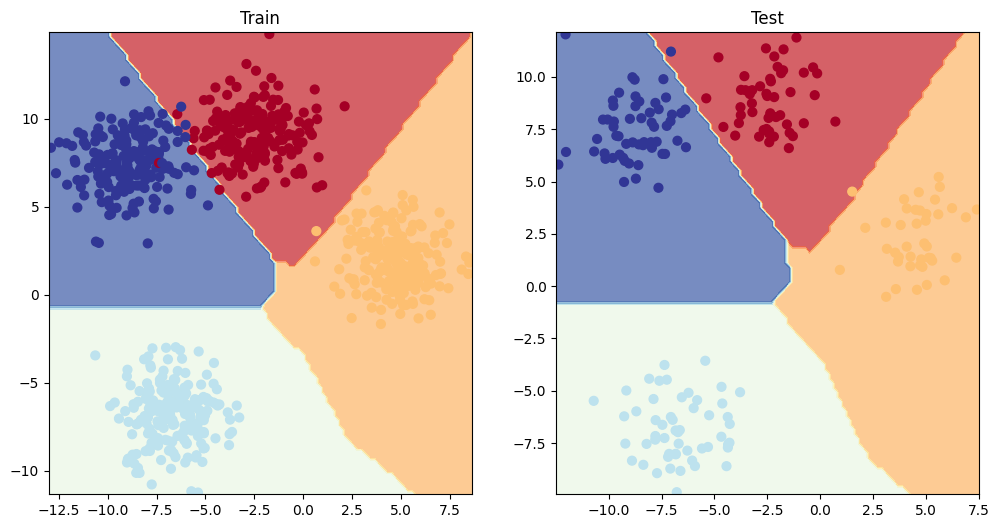

In [43]:
# Plot and visualize
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)

In [44]:
%pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\saket\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [47]:
from torchmetrics import Accuracy

accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)
accuracy(y_preds, y_blob_train)

tensor(0.9912, device='cuda:0')